In [1]:
# 使jupyter能够交互式显示图像
%matplotlib notebook

import json
import datetime

import pandas as pd
from numpy import array
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib.figure as fig
   
from pyspark.sql import *
import matplotlib.font_manager as fm
my_font=fm.FontProperties(fname="/Users/ppx/Desktop/中文字体/simsun.ttf")

In [2]:
# 加载 LEWTEB144HE103899 数据
data=spark.read.json("hdfs://cdh1:8020/user/hbase/pro_dfjk4new/fault_data/2018-11-21/")
data.first()

AnalysisException: 'Unable to infer schema for JSON. It must be specified manually.;'

In [ ]:
# 使用pandas合并
# 提取resd_subsystem_voltage_list列表的数据转为列
resd_subsystem_voltage_list1=data.select("resd_subsystem_voltage_list").rdd.map(lambda x:(eval(x[0])[0])).toDF()

# 使用pandas设置索引
pdf1=resd_subsystem_voltage_list1.toPandas()
pdf1.insert(0,"index1",pdf1.index)

# 获取电池组数据
battery_cell_voltage_list1=resd_subsystem_voltage_list1.select(resd_subsystem_voltage_list1.battery_cell_voltage_list)\
                            .rdd.map(lambda x:x[0]).toDF()

pdf2=battery_cell_voltage_list1.toPandas()
pdf2.insert(0,"index2",pdf2.index)

# 合并resd_subsystem_voltage_list表
resd_subsystem_voltage_list=pdf1.join(pdf2,how="inner")
resd_subsystem_voltage_list=pd.concat([pdf1,pdf2],axis=1,join="inner")

# 合并全表
pdf3=data.toPandas()
pdf3.insert(0,"index",pdf3.index)
# data21=pdf3.join(resd_subsystem_voltage_list,how="inner")
data21=pd.concat([pdf3,resd_subsystem_voltage_list],axis=1,join="inner")
data21['battery_cell_voltage_list']

# 提取电池组电压
battery_voltage_list=pdf2.drop("index2",axis=1).round(decimals=2)
type(battery_voltage_list)
# 求方差，每行数据的方差
np.var(battery_voltage_list,axis=1)

In [ ]:
# 电压趋势图
data1=data.toPandas()
data2=pd.DataFrame(data1[['obd_time','voltage']])
data2['voltage']=data2['voltage'].astype('double')

# 设置时间间隔，随数据条数画图可以不设置
# pd.date_range(start='2018-08-08 00:00:00',end='2018-08-08 23:59:59',freq='H')

# 1.将时间字段（字符串类型）转为pandas的时间类型
data2['obd_time'] = pd.to_datetime(data2['obd_time'])

# 2.将时间字段设置为索引,inplace表示原地调整
data2.set_index('obd_time',inplace=True)

# 测试设置索引是否成功
# data2['2018-08-08 00:05:48':]

# 3.为坐标指定索引和值，绘图使用的是索引为横坐标
_x = data2.index
_y = data2.values

plt.figure(figsize=(300,5),dpi=60,edgecolor="blue",facecolor="lightpink")
plt.subplots_adjust(left=0.005,right=0.995,top=0.9,bottom=0.4)
plt.title('电压变化图',fontproperties=my_font,fontsize=18,pad=1)

plt.plot(range(len(_x)),_y,color='r')
plt.xlim(0,20)
# plt.ylim()
plt.xticks(range(len(_x)),_x,rotation=90,fontsize=12)
plt.yticks(fontsize=12)
# plt.xlabel('单位:s',fontproperties=my_font)
plt.ylabel('单位：v',fontproperties=my_font,fontsize=15,rotation=90)

plt.savefig("/Users/ppx/Desktop/picture/LEWTEB141HE103925电压变化图.jpg")
plt.show()

In [ ]:
list1=[]
for n in data21['battery_cell_voltage_list']:
    list1.append(np.var(n).round(4))
data21['battery_cell_voltage_list_var']=list1

data21['battery_cell_voltage_list_var']=data21['battery_cell_voltage_list_var'].astype('double')

data21['obd_time'] = pd.to_datetime(data21['obd_time'])
data21.set_index('obd_time',inplace=True)

# 设置x.y坐标
_x = data21.index
_y1 = data21.battery_cell_voltage_list_var

plt.figure(figsize=(300,5),dpi=60,edgecolor="blue",facecolor="lightpink")
plt.subplots_adjust(left=0.005,right=0.995,top=0.9,bottom=0.4)

plt.title('电池组方差图',fontproperties=my_font,fontsize=20,pad=1)
plt.plot(range(len(_x)),_y1,color='r')
plt.xlim(0,20)
# plt.ylim()
plt.grid()
plt.xticks(range(len(_x)),_x,rotation=90,fontsize=12)
plt.yticks(fontsize=12)
# plt.xlabel('单位:s',fontproperties=my_font)
# plt.ylabel('单位：V',fontproperties=my_font,fontsize=15,rotation=90)


plt.savefig("/Users/ppx/Desktop/picture/LEWTEB141HE103925电池组方差图.jpg")
plt.show()

In [3]:
# 电流变化图

data3=pd.DataFrame(data1[['obd_time','current']])
data3['current']=data3['current'].astype('double')

# 设置时间间隔，随数据条数画图可以不设置
# pd.date_range(start='2018-08-08 00:00:00',end='2018-08-08 23:59:59',freq='H')

# 1.将时间字段（字符串类型）转为pandas的时间类型
data3['obd_time'] = pd.to_datetime(data3['obd_time'])

# 2.将时间字段设置为索引,inplace表示原地调整
data3.set_index('obd_time',inplace=True)

# 测试设置索引是否成功
# data2['2018-08-08 00:05:48':]

# 3.为坐标指定索引和值，绘图使用的是索引为横坐标
_x = data3.index
_y = data3.values

plt.figure(figsize=(300,5),dpi=60,edgecolor="blue",facecolor="lightpink")
plt.subplots_adjust(left=0.005,right=0.995,top=0.9,bottom=0.4)
plt.title('电流变化图',fontproperties=my_font,fontsize=20,pad=10)

plt.plot(range(len(_x)),_y,color='r')
plt.xlim(0,20)
# plt.ylim()
plt.xticks(range(len(_x)),_x,rotation=90,fontsize=12)
plt.yticks(fontsize=12)
# plt.xlabel('单位:s',fontproperties=my_font)
plt.ylabel('单位：A',fontproperties=my_font,fontsize=15,rotation=90)

plt.savefig("/Users/ppx/Desktop/picture/LEWTEB141HE103925电流变化图.jpg")
plt.show()

NameError: name 'data1' is not defined

<IPython.core.display.Javascript object>


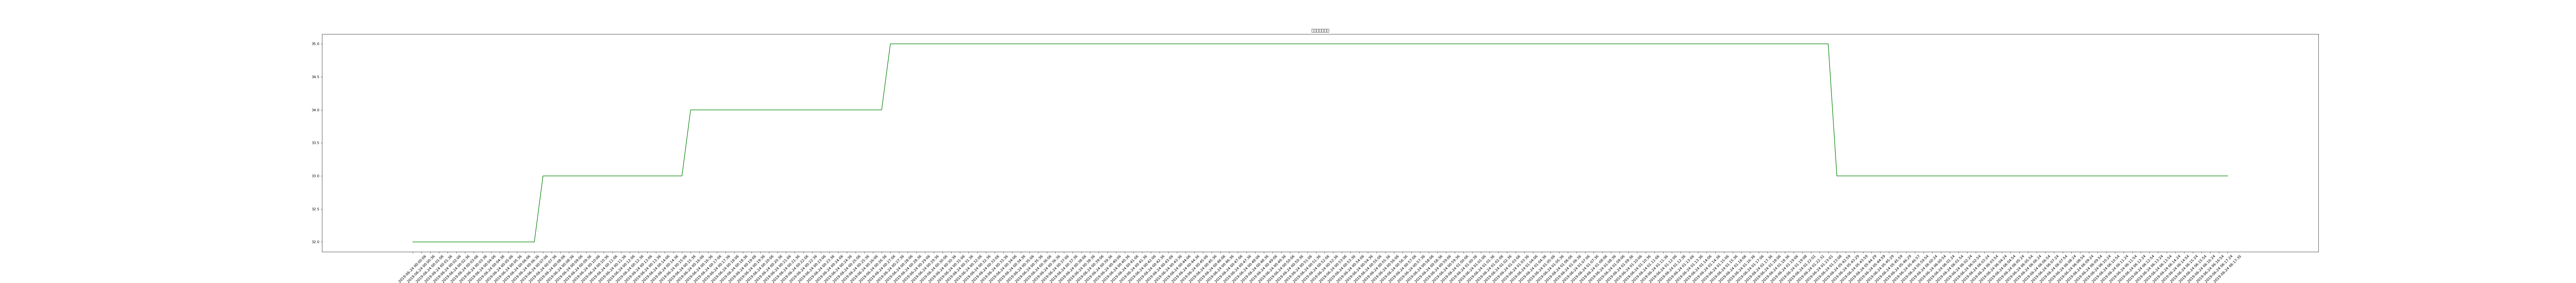

<IPython.core.display.Javascript object>


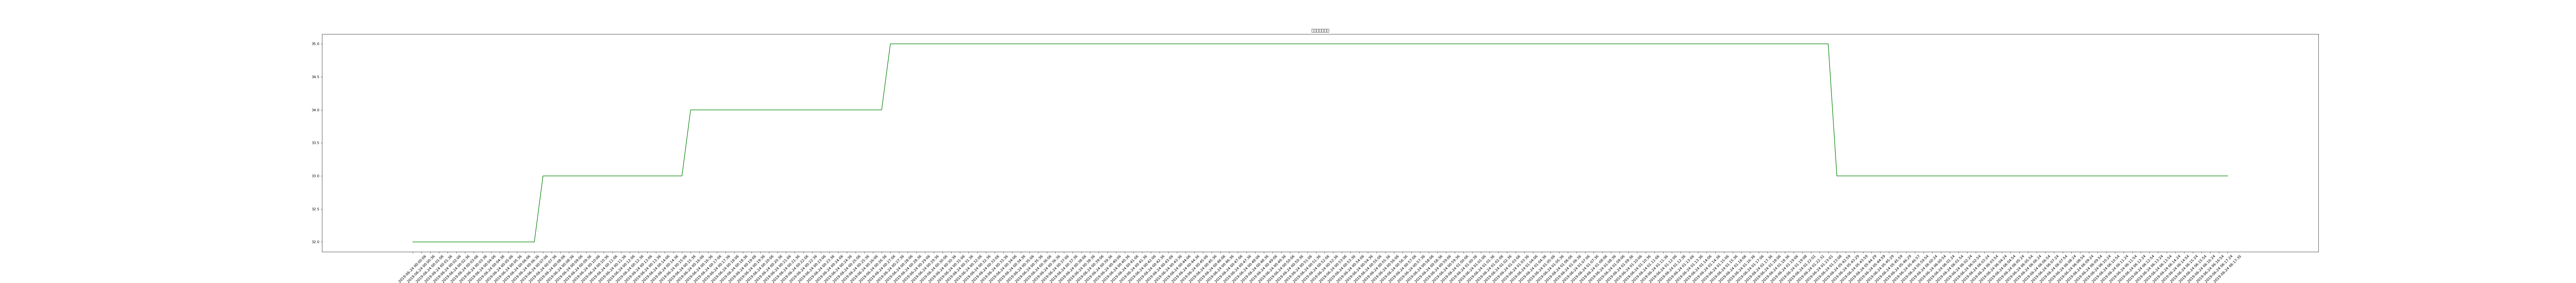

Text(0.5, 1.0, '最高温度变化图')

([<matplotlib.axis.XTick at 0x12dc91668>,
 <a list of 210 Text xticklabel objects>)

In [10]:
# 最高温度变化图

data4=pd.DataFrame(data1[['obd_time','maximum_temperature_value']])
data4['maximum_temperature_value']=data4['maximum_temperature_value'].astype('double')

# 设置时间间隔，随数据条数画图可以不设置
# pd.date_range(start='2018-08-08 00:00:00',end='2018-08-08 23:59:59',freq='H')

# 1.将时间字段（字符串类型）转为pandas的时间类型
data4['obd_time'] = pd.to_datetime(data4['obd_time'])

# 2.将时间字段设置为索引,inplace表示原地调整
data4.set_index('obd_time',inplace=True)

# 测试设置索引是否成功
# data2['2018-08-08 00:05:48':]

# 3.为坐标指定索引和值，绘图使用的是索引为横坐标
_x = data4.index
_y = data4.values

plt.figure(figsize=(300,5),dpi=60,edgecolor="blue",facecolor="lightpink")
plt.subplots_adjust(left=0.005,right=0.995,top=0.9,bottom=0.4)
plt.title('最高温度变化图',fontproperties=my_font,fontsize=20,pad=1)

plt.plot(range(len(_x)),_y,color='g')
plt.xlim(0,20)
# plt.ylim()
plt.xticks(range(len(_x)),_x,rotation=90,fontsize=12)
plt.yticks(fontsize=12)
# plt.xlabel('单位:s',fontproperties=my_font)
plt.ylabel('单位：℃',fontproperties=my_font,fontsize=15,rotation=90)

plt.savefig("/Users/ppx/Desktop/picture/LEWTEB141HE103925最高温度变化图.jpg")
plt.show()

In [ ]:
# 最低温度变化图

data5=pd.DataFrame(data1[['obd_time','minimum_temperature_value']])
data5['minimum_temperature_value']=data5['minimum_temperature_value'].astype('double')

# 设置时间间隔，随数据条数画图可以不设置
# pd.date_range(start='2018-08-08 00:00:00',end='2018-08-08 23:59:59',freq='H')

# 1.将时间字段（字符串类型）转为pandas的时间类型
data5['obd_time'] = pd.to_datetime(data5['obd_time'])

# 2.将时间字段设置为索引,inplace表示原地调整
data5.set_index('obd_time',inplace=True)

# 测试设置索引是否成功
# data2['2018-08-08 00:05:48':]

# 3.为坐标指定索引和值，绘图使用的是索引为横坐标
_x = data5.index
_y = data5.values

plt.figure(figsize=(100,10),dpi=80)
plt.title('最低温度变化图',fontproperties=my_font,fontsize=20,pad=10)

plt.plot(range(len(_x)),_y,color='b')
# rotation表字体倾斜45度
plt.xticks(range(len(_x)),_x,rotation=45)
plt.show()